In [335]:
%matplotlib inline

In [336]:
import cot_reports as cot
import pandas as pd

# Example for collecting data of a few years, here from 2017 to 2020, of a specified report:
df = pd.DataFrame()
begin_year = 2011
end_year = 2024
for i in range(begin_year, end_year + 1):
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='traders_in_financial_futures_fut')) 
    df = pd.concat([df, single_year], ignore_index=True)


Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2011
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2012
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2013
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2014
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2015
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2016
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fut
Downloaded single year data from: 2017
Stored the file FinFutYY.txt in the working directory.
Selected: traders_in_financial_futures_fu

In [337]:
df.columns

Index(['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD',
       'Report_Date_as_MM_DD_YYYY', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code',
       'Open_Interest_All', 'Dealer_Positions_Long_All',
       'Dealer_Positions_Short_All', 'Dealer_Positions_Spread_All',
       'Asset_Mgr_Positions_Long_All', 'Asset_Mgr_Positions_Short_All',
       'Asset_Mgr_Positions_Spread_All', 'Lev_Money_Positions_Long_All',
       'Lev_Money_Positions_Short_All', 'Lev_Money_Positions_Spread_All',
       'Other_Rept_Positions_Long_All', 'Other_Rept_Positions_Short_All',
       'Other_Rept_Positions_Spread_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All',
       'NonRept_Positions_Short_All', 'Change_in_Open_Interest_All',
       'Change_in_Dealer_Long_All', 'Change_in_Dealer_Short_All',
       'Change_in_Dealer_Spread_All', 'Change_in_Asset_Mgr_Long_All',
       'Change_in_Asset_Mgr_Short_A

In [338]:
market_name = "NASDAQ-100 Consolidated - CHICAGO MERCANTILE EXCHANGE"

In [339]:
import plotly.graph_objects as go

# Filter the dataframe for NASDAQ-100 Consolidated
cot_df = df[df['Market_and_Exchange_Names'] == market_name]

# Convert 'As_of_Date_In_Form_YYMMDD' to datetime
cot_df.loc[:, 'Date'] = pd.to_datetime(cot_df['As_of_Date_In_Form_YYMMDD'], format='%y%m%d')

# Sort the dataframe by date
cot_df = cot_df.sort_values('Date')

cot_df['Change_in_Tot_Rept_Long_All'] = cot_df['Change_in_Tot_Rept_Long_All'].astype(float)

# Create the plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=cot_df['Date'], y=cot_df['Change_in_Tot_Rept_Long_All'],
                         mode='lines', name='Change in Total Reportable Long Positions'))

# Customize the plot
fig.update_layout(
    title='Change in Total Reportable Long Positions for NASDAQ-100 Consolidated',
    xaxis_title='Date',
    yaxis_title='Change in Total Reportable Long Positions',
    width=1200,
    height=600
)

# Show the plot
fig.show()


C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\3338226106.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [340]:
# Read the BTC/USD data from CSV file
btc_usd_df = pd.read_csv('../data/btcusd.csv')

# Convert the 'Date' column to datetime
btc_usd_df['Date'] = pd.to_datetime(btc_usd_df['time']/1000, unit='s')

# Sort the dataframe by date
btc_usd_df = btc_usd_df.sort_values('Date')

# Resample the data to daily intervals
btc_usd_df = btc_usd_df.set_index('Date').resample('d').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).reset_index()

# Display the first few rows of the dataframe
print(btc_usd_df.head())

# Display basic information about the dataframe
print(btc_usd_df.info())


        Date        open      high        low       close        volume
0 2013-04-01   93.250000  105.9000   92.49999  103.999000   5224.401313
1 2013-04-02  104.000000  118.3867   99.00000  118.229354   8376.527478
2 2013-04-03  117.958261  146.8800  101.51088  134.700000  12996.245072
3 2013-04-04  134.716560  143.0000  119.00000  132.899000   6981.668305
4 2013-04-05  130.100010  145.0000  128.25000  142.300000   5234.882203
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3843 non-null   datetime64[ns]
 1   open    3706 non-null   float64       
 2   high    3706 non-null   float64       
 3   low     3706 non-null   float64       
 4   close   3706 non-null   float64       
 5   volume  3843 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 180.3 KB
None


In [341]:
# Strategy Parameters

prediction_lag = 1 # Time to predict ahead
sequence_length = 5  # Length of the sequence of features in LSTM


In [342]:
# Ensure both dataframes have a common date format
cot_df['Date'] = pd.to_datetime(cot_df['Date']).dt.date
btc_usd_df['Date'] = pd.to_datetime(btc_usd_df['Date']).dt.date

# Merge the dataframes on the 'Date' column
merged_df = pd.merge(btc_usd_df, cot_df[['Date', 'Change_in_Tot_Rept_Long_All']], on='Date', how='left')

# Rename the column for clarity
merged_df = merged_df.rename(columns={'Change_in_Tot_Rept_Long_All': 'NASDAQ_Change_in_Tot_Rept_Long_All'})

# Convert the new column to float (if it's not already)
merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].astype(float)

# Fill NaN values with 0 or the last known value
# Option 1: Fill with 0
# merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].fillna(0)

# Option 2: Forward fill (use the last known value)
merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].ffill()

# Update btc_usd_df with the new column
btc_df = merged_df

# Display the first few rows of the updated dataframe
print(btc_df.head())

# Display basic information about the updated dataframe
print(btc_df.info())

print(btc_df[btc_df['NASDAQ_Change_in_Tot_Rept_Long_All'].notna()])


         Date        open      high        low       close        volume  \
0  2013-04-01   93.250000  105.9000   92.49999  103.999000   5224.401313   
1  2013-04-02  104.000000  118.3867   99.00000  118.229354   8376.527478   
2  2013-04-03  117.958261  146.8800  101.51088  134.700000  12996.245072   
3  2013-04-04  134.716560  143.0000  119.00000  132.899000   6981.668305   
4  2013-04-05  130.100010  145.0000  128.25000  142.300000   5234.882203   

   NASDAQ_Change_in_Tot_Rept_Long_All  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                3843 non-null   object 
 1

In [343]:
# Shift the 'close' column by -3 to create the target column (BTCUSD close price at T+3)
btc_df['Target_Close'] = btc_df['close'].shift(-prediction_lag)

# Drop rows with NaN in 'Target_Close' (these are the last 3 rows after shifting)
btc_df = btc_df.dropna(subset=['Target_Close']).reset_index(drop=True)

print(btc_df.head(10))

btc_df.tail()

         Date        open      high        low       close        volume  \
0  2013-04-01   93.250000  105.9000   92.49999  103.999000   5224.401313   
1  2013-04-02  104.000000  118.3867   99.00000  118.229354   8376.527478   
2  2013-04-03  117.958261  146.8800  101.51088  134.700000  12996.245072   
3  2013-04-04  134.716560  143.0000  119.00000  132.899000   6981.668305   
4  2013-04-05  130.100010  145.0000  128.25000  142.300000   5234.882203   
5  2013-04-06  142.800000  144.0000  139.00000  143.050000   2009.128625   
6  2013-04-07  143.500000  164.7500  142.75000  162.304000   3725.067645   
7  2013-04-08  163.900000  194.5700  163.20000  186.985000  10895.827414   
8  2013-04-09  186.800000  249.9700  186.80000  232.990000   6073.373146   
9  2013-04-10  228.669000  290.0000   19.90000  162.000000  16070.642744   

   NASDAQ_Change_in_Tot_Rept_Long_All  Target_Close  
0                                 NaN    118.229354  
1                                 NaN    134.700000  
2

,Date,open,high,low,close,volume,NASDAQ_Change_in_Tot_Rept_Long_All,Target_Close
3700,2023-10-03,27532.0,27700.0,27176.0,27431.0,767.656761,17011.0,27813.0
3701,2023-10-04,27431.0,27846.0,27211.0,27813.0,889.626490,17011.0,27418.0
3702,2023-10-05,27815.0,28134.0,27369.0,27418.0,1444.942181,17011.0,27942.0
3703,2023-10-06,27418.0,28297.0,27195.0,27942.0,1622.530649,17011.0,27967.0
3704,2023-10-07,27927.0,28026.0,27840.0,27967.0,447.166805,17011.0,27912.0


In [344]:
# Convert the 'Date' column to datetime if it's not already
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

# Define the date we want to center around
center_date = pd.to_datetime('2022-09-07')

# Filter the dataframe to show 5 days before and after September 7, 2022
start_date = center_date - pd.Timedelta(days=5)
end_date = center_date + pd.Timedelta(days=5)

# Filter and print the dataframe
print(btc_df[(btc_df['Date'] >= start_date) & (btc_df['Date'] <= end_date)])

           Date          open          high           low         close  \
3304 2022-09-02  20142.417110  20441.422606  19764.000000  19970.000000   
3305 2022-09-03  19969.843809  20063.729151  19646.412910  19835.000000   
3306 2022-09-04  19833.706746  20039.000000  19589.000000  20003.000000   
3307 2022-09-05  20004.000000  20060.000000  19637.000000  19788.909055   
3308 2022-09-06  19789.000000  20183.000000  18675.000000  18794.000000   
3309 2022-09-07  18794.000000  19463.000000  18549.000000  19286.000000   
3310 2022-09-08  19286.000000  19460.000000  19029.171302  19321.993434   
3311 2022-09-09  19323.453898  21590.000000  19304.356640  21373.000000   
3312 2022-09-10  21373.000000  21802.000000  21139.000000  21656.000000   
3313 2022-09-11  21654.417949  21854.000000  21359.000000  21834.000000   
3314 2022-09-12  21832.924659  22480.000000  21553.000000  22395.000000   

            volume  NASDAQ_Change_in_Tot_Rept_Long_All  Target_Close  
3304   6295.632741          

In [345]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select features
features = ['open', 'high', 'low', 'close', 'volume', 'NASDAQ_Change_in_Tot_Rept_Long_All']

# Assuming 'Target_Close' has been shifted and NaNs dropped
# Remove any remaining NaNs to avoid issues during scaling and sequencing
btc_df.dropna(subset=features + ['Target_Close'], inplace=True)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(btc_df) * split_ratio)

btc_df_train = btc_df.iloc[:split_index].reset_index(drop=True)
btc_df_test = btc_df.iloc[split_index:].reset_index(drop=True)

# Keep a copy of the unscaled test data
btc_df_test_unscaled = btc_df_test.copy()

# Fit scalers on training data
scaler = MinMaxScaler()
scaler.fit(btc_df_train[features])

target_scaler = MinMaxScaler()
target_scaler.fit(btc_df_train['Target_Close'].values.reshape(-1, 1))

# Transform both training and testing data
btc_df_train[features] = scaler.transform(btc_df_train[features])
btc_df_test[features] = scaler.transform(btc_df_test[features])

btc_df_train['Target_Close'] = target_scaler.transform(btc_df_train['Target_Close'].values.reshape(-1, 1))
btc_df_test['Target_Close'] = target_scaler.transform(btc_df_test['Target_Close'].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, features, sequence_length):
    X = []
    y = []
    for i in range(sequence_length, len(data) - prediction_lag):
        X_seq = data[features].iloc[i-sequence_length:i].values
        print(X_seq)
        y_target = data['Target_Close'].iloc[i+prediction_lag-1]
        print(y_target)
        X.append(X_seq)
        y.append(y_target)
    return np.array(X), np.array(y)

# testx, testy = create_sequences(btc_df, features, sequence_length)

# Create sequences from training data
X_train, y_train = create_sequences(btc_df_train, features, sequence_length)

# Create sequences from testing data
X_test, y_test = create_sequences(btc_df_test, features, sequence_length)

# Handle NaNs if any
valid_indices_train = ~np.isnan(X_train).any(axis=(1, 2)) & ~np.isnan(y_train)
X_train = X_train[valid_indices_train]
y_train = y_train[valid_indices_train]

valid_indices_test = ~np.isnan(X_test).any(axis=(1, 2)) & ~np.isnan(y_test)
X_test = X_test[valid_indices_test]
y_test = y_test[valid_indices_test]

print("Training data shapes:", X_train.shape, y_train.shape)
print("Testing data shapes:", X_test.shape, y_test.shape)

[[0.00139357 0.00113377 0.00166405 0.00158039 0.12900371 0.57438215]
 [0.00159418 0.00129946 0.0018439  0.00172235 0.11048166 0.57438215]
 [0.00173569 0.00122876 0.00181383 0.00150288 0.11639448 0.57438215]
 [0.00152929 0.00121203 0.00178949 0.00161128 0.10237761 0.57438215]
 [0.00162714 0.0011361  0.00170788 0.00139626 0.08850185 0.57438215]]
0.0012881622713233547
[[0.00159418 0.00129946 0.0018439  0.00172235 0.11048166 0.57438215]
 [0.00173569 0.00122876 0.00181383 0.00150288 0.11639448 0.57438215]
 [0.00152929 0.00121203 0.00178949 0.00161128 0.10237761 0.57438215]
 [0.00162714 0.0011361  0.00170788 0.00139626 0.08850185 0.57438215]
 [0.0014108  0.00100169 0.00156928 0.00126619 0.08040074 0.57438215]]
0.0006840995485863626
[[0.00173569 0.00122876 0.00181383 0.00150288 0.11639448 0.57438215]
 [0.00152929 0.00121203 0.00178949 0.00161128 0.10237761 0.57438215]
 [0.00162714 0.0011361  0.00170788 0.00139626 0.08850185 0.57438215]
 [0.0014108  0.00100169 0.00156928 0.00126619 0.08040074 

In [346]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(sequence_length, len(features))))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0257 - val_loss: 7.3410e-04
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9723e-04 - val_loss: 8.4476e-04
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7030e-04 - val_loss: 0.0011
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0587e-04 - val_loss: 8.5075e-04
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.6837e-04 - val_loss: 6.7815e-04
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3839e-04 - val_loss: 6.7073e-04
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2779e-04 - val_loss: 7.7070e-04
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1264e-04 - val_loss: 6.4602e-04
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0866e-04 - val_loss: 9.2740e-04
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9758e-04 - val_loss: 7.3952e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7621e-04 - val_loss: 8.986

In [347]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 6.3017e-04
Test Loss: 0.0004799801972694695


In [348]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_scaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_scaled = target_scaler.inverse_transform(y_pred)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [349]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

RMSE: 1475.402812580813
MAE: 933.9105145976873


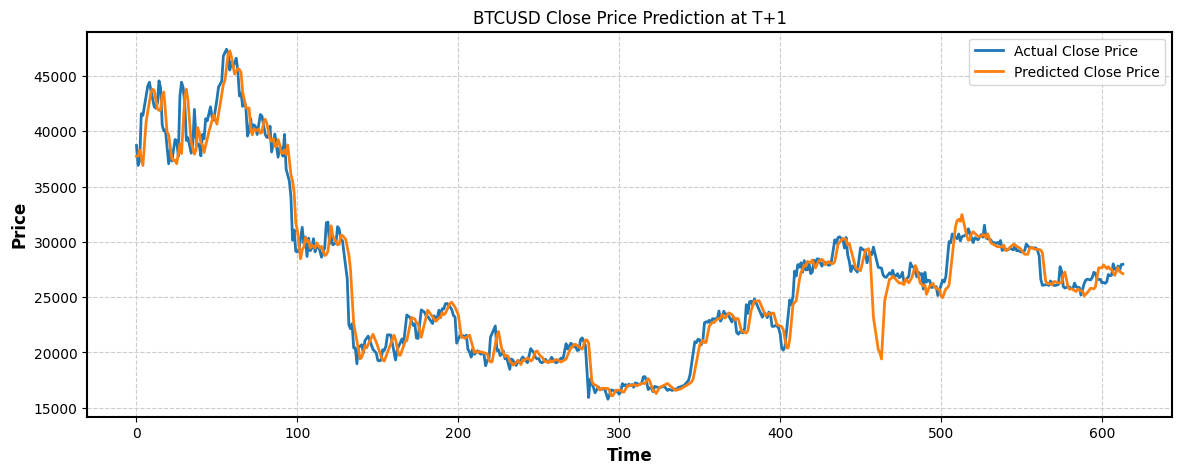

In [350]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test_scaled, label='Actual Close Price')
plt.plot(y_pred_scaled, label='Predicted Close Price')
plt.title(f'BTCUSD Close Price Prediction at T+{prediction_lag}')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [351]:
# Prepping data for strategy backtesting

def create_sequences_test(data, features, sequence_length):
    X = []
    y = []
    sequence_end_dates = []
    target_dates = []
    cot_change_flags = []
    for i in range(sequence_length, len(data) - prediction_lag):
        X_seq = data[features].iloc[i-sequence_length:i].values
        y_target = data['Target_Close'].iloc[i+prediction_lag-1]
        X.append(X_seq)
        y.append(y_target)
        sequence_end_dates.append(data['Date'].iloc[i-1])
        target_dates.append(data['Date'].iloc[i+prediction_lag-1])
        cot_change_flags.append(data['NASDAQ_Change_in_Tot_Rept_Long_All'].iloc[i-1] != data['NASDAQ_Change_in_Tot_Rept_Long_All'].iloc[i-2])
    return np.array(X), np.array(y), sequence_end_dates, target_dates, cot_change_flags

# Create sequences for testing data
X_test, y_test, sequence_end_dates_test, target_dates_test, cot_change_flags_test = create_sequences_test(btc_df_test, features, sequence_length)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_unscaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = target_scaler.inverse_transform(y_pred)

# Build a DataFrame with the results
results_df = pd.DataFrame({
    'Sequence_End_Date': sequence_end_dates_test,
    'Target_Date': target_dates_test,
    'COT_Change_Flag': cot_change_flags_test,
    'Predicted_Price': y_pred_unscaled.flatten(),
    'Actual_Price': y_test_unscaled.flatten()
})


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


In [352]:
# Map the open prices to the Target_Date
btc_df_test['Date'] = pd.to_datetime(btc_df_test['Date'])
prices_df = btc_df_test_unscaled[['Date', 'open', 'high', 'low', 'close']].set_index('Date')

# Add Entry_Price to results_df
results_df['Entry_Price'] = results_df['Target_Date'].map(prices_df['open'])

print(prices_df)


                    open     high           low         close
Date                                                         
2022-01-26  36995.000000  38935.0  36291.695939  36828.542176
2022-01-27  36847.647615  37275.0  35504.000000  37194.000000
2022-01-28  37187.000000  38055.0  36197.000000  37759.827189
2022-01-29  37748.000000  38898.0  37347.691827  38179.911234
2022-01-30  38201.609790  38403.0  37386.000000  37914.380832
...                  ...      ...           ...           ...
2023-10-03  27532.000000  27700.0  27176.000000  27431.000000
2023-10-04  27431.000000  27846.0  27211.000000  27813.000000
2023-10-05  27815.000000  28134.0  27369.000000  27418.000000
2023-10-06  27418.000000  28297.0  27195.000000  27942.000000
2023-10-07  27927.000000  28026.0  27840.000000  27967.000000

[620 rows x 4 columns]


In [353]:
# Trade parameters

initial_capital = 10000  # Starting capital
capital = initial_capital  # Capital that will be updated after each trade
capital_at_risk = 3
target_price_multiplier = 1
stop_loss_multiplier = 0.02
slippage = 0.01
fees = 0.001
entry_threshold = 0.01


In [354]:
trades = []

for idx, row in results_df.iterrows():
    if row['COT_Change_Flag']:
        predicted_price = row['Predicted_Price']
        potential_entry_price = row['Entry_Price']
        
        # Skip if potential_entry_price or predicted_price is NaN
        if np.isnan(potential_entry_price) or np.isnan(predicted_price):
            continue
        
        # Determine the position and calculate target and stop-loss prices
        if predicted_price > potential_entry_price * (1 + entry_threshold + 2 * (slippage + fees)):
            position = 'long'
            entry_date = row['Target_Date']
            entry_price = potential_entry_price
            target_price = entry_price + target_price_multiplier * (predicted_price - entry_price)
            stop_price = entry_price - stop_loss_multiplier * entry_price
            stop_loss_amount = entry_price - stop_price  # Amount risked per unit
        elif predicted_price < potential_entry_price * (1 - entry_threshold - 2 * (slippage + fees)):
            position = 'short'
            entry_date = row['Target_Date']
            entry_price = potential_entry_price
            target_price = entry_price - target_price_multiplier * (entry_price - predicted_price)
            stop_price = entry_price + stop_loss_multiplier * entry_price
            stop_loss_amount = stop_price - entry_price  # Amount risked per unit
        else:
            continue  # Skip this iteration if thresholds aren't met

        trade_amount = capital * capital_at_risk
        
        # Determine the number of units to trade
        units = trade_amount / entry_price
        
        # Check if units are feasible (avoid division by zero)
        if units <= 0 or np.isinf(units):
            continue
        
        # Simulate the trade
        exit_date = None
        exit_price = None
        profit_loss = None
        
        # Get dates at and after the entry date
        dates_after_entry = prices_df.loc[entry_date:].index
        
        for current_date in dates_after_entry:
            close_price = prices_df.loc[current_date, 'close']
            high_price = prices_df.loc[current_date, 'high']
            low_price = prices_df.loc[current_date, 'low']
            if position == 'long':
                if low_price <= stop_price:
                    exit_date = current_date
                    exit_price = stop_price
                    profit_loss = (entry_price - exit_price) * units
                    capital += profit_loss  # Update capital
                    break
                elif close_price >= target_price:
                    exit_date = current_date
                    exit_price = close_price
                    profit_loss = (exit_price - entry_price) * units
                    capital += profit_loss  # Update capital
                    break

            else:  # short position
                if high_price >= stop_price:
                    exit_date = current_date
                    exit_price = stop_price
                    profit_loss = (entry_price - exit_price) * units
                    capital += profit_loss  # Update capital
                    break
                elif close_price <= target_price:
                    exit_date = current_date
                    exit_price = close_price
                    profit_loss = (entry_price - exit_price) * units
                    capital += profit_loss  # Update capital
                    break
        
        # If the trade is still open at the end of data, close it
        if exit_date is None:
            exit_date = dates_after_entry[-1]
            exit_price = prices_df.loc[exit_date, 'close']
            if position == 'long':
                profit_loss = (exit_price - entry_price) * units
            else:
                profit_loss = (entry_price - exit_price) * units
            capital += profit_loss  # Update capital
        
        # Record the trade
        trade = {
            'Entry_Date': entry_date,
            'Entry_Price': entry_price,
            'Position': position,
            'Units': units,
            'Target_Price': target_price,
            'Stop_Price': stop_price,
            'Exit_Date': exit_date,
            'Exit_Price': exit_price,
            'Profit_Loss': profit_loss,
            'Remaining_Capital': capital
        }
        trades.append(trade)
        
        # Optionally, you can stop trading if capital falls below a threshold
        if capital <= 0:
            print("No more capital to trade.")
            break

# Create a DataFrame of trades
trades_df = pd.DataFrame(trades)

In [355]:
# Calculate total profit/loss
total_profit_loss = trades_df['Profit_Loss'].sum()
print(f"Total Profit/Loss: {total_profit_loss}")

# Number of trades
total_trades = len(trades_df)
print(f"Total Trades: {total_trades}")

# Number of winning trades
winning_trades = trades_df[trades_df['Profit_Loss'] > 0].shape[0]
print(f"Winning Trades: {winning_trades}")

# Number of losing trades
losing_trades = trades_df[trades_df['Profit_Loss'] <= 0].shape[0]
print(f"Losing Trades: {losing_trades}")

# Average profit per trade
average_profit = trades_df['Profit_Loss'].mean()
print(f"Average Profit per Trade: {average_profit}")

# Print the trades
print(trades_df)


Total Profit/Loss: 9784.44918565511
Total Trades: 10
Winning Trades: 7
Losing Trades: 3
Average Profit per Trade: 978.444918565511
  Entry_Date  Entry_Price Position     Units  Target_Price  Stop_Price  \
0 2022-06-29      20271.0     long  1.479947  20938.023438    19865.58   
1 2022-07-20      23384.0    short  1.359904  22525.951172    23851.68   
2 2022-09-14      20177.0     long  1.481489  21024.951172    19773.46   
3 2022-11-09      18557.0     long  1.707470  19269.140625    18185.86   
4 2023-04-26      29765.0    short  1.128394  27394.025391    30360.30   
5 2023-05-03      28680.0    short  1.495555  25037.164062    29253.60   
6 2023-05-10      27668.0    short  1.457242  22524.511719    28221.36   
7 2023-06-07      27234.0    short  1.391637  25798.507812    27778.68   
8 2023-06-28      30715.0     long  1.517729  32461.433594    30100.70   
9 2023-09-27      26250.0     long  1.882440  27755.828125    25725.00   

   Exit_Date  Exit_Price  Profit_Loss  Remaining_Capit

In [356]:
from plotly.subplots import make_subplots

# Prepare the price data
prices_df_chart = prices_df.copy()
prices_df_chart.index = pd.to_datetime(prices_df_chart.index)
prices_df_chart.rename(columns={
    'open': 'Open',
    'high': 'High',
    'low': 'Low',
    'close': 'Close',
    'volume': 'Volume'
}, inplace=True)
prices_df_chart.sort_index(inplace=True)

# Prepare the trade data
trades_df['Entry_Date'] = pd.to_datetime(trades_df['Entry_Date'])
trades_df['Exit_Date'] = pd.to_datetime(trades_df['Exit_Date'])
trades_df.sort_values('Exit_Date', inplace=True)

# Calculate capital over time
capital_over_time = trades_df[['Exit_Date', 'Remaining_Capital']].copy()
capital_over_time.drop_duplicates(subset='Exit_Date', inplace=True)

# Create full date range
full_date_range = pd.date_range(start=prices_df_chart.index.min(), end=prices_df_chart.index.max(), freq='D')

# Capital time series
capital_time_series = pd.DataFrame(index=full_date_range)
capital_time_series = capital_time_series.merge(capital_over_time.set_index('Exit_Date'), left_index=True, right_index=True, how='left')
capital_time_series['Remaining_Capital'].fillna(method='ffill', inplace=True)
initial_capital = trades_df['Remaining_Capital'].iloc[0] - trades_df['Profit_Loss'].iloc[0]
capital_time_series['Remaining_Capital'].fillna(initial_capital, inplace=True)
capital_time_series['Strategy_Returns'] = capital_time_series['Remaining_Capital'] / initial_capital - 1

# Price time series for buy-and-hold returns
price_time_series = prices_df_chart['Close'].reindex(full_date_range).ffill()
initial_price = price_time_series.iloc[0]
price_time_series = price_time_series.to_frame(name='Close')
price_time_series['Buy_and_Hold_Returns'] = price_time_series['Close'] / initial_price - 1

# Create subplots
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.1,
    subplot_titles=('BTCUSD Price with Trades', 'Cumulative Returns')
)

# Add candlestick chart
fig.add_trace(go.Candlestick(
    x=prices_df_chart.index,
    open=prices_df_chart['Open'],
    high=prices_df_chart['High'],
    low=prices_df_chart['Low'],
    close=prices_df_chart['Close'],
    name='Price'
), row=1, col=1)

# Add entry and exit markers
fig.add_trace(go.Scatter(
    x=trades_df['Entry_Date'],
    y=trades_df['Entry_Price'],
    mode='markers',
    marker=dict(
        symbol='triangle-up',
        color='green',
        size=10
    ),
    name='Entry'
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=trades_df['Exit_Date'],
    y=trades_df['Exit_Price'],
    mode='markers',
    marker=dict(
        symbol='triangle-down',
        color='red',
        size=10
    ),
    name='Exit'
), row=1, col=1)

# Add cumulative returns
fig.add_trace(go.Scatter(
    x=capital_time_series.index,
    y=capital_time_series['Strategy_Returns'],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Strategy Returns'
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=price_time_series.index,
    y=price_time_series['Buy_and_Hold_Returns'],
    mode='lines',
    line=dict(color='orange', width=2),
    name='Buy and Hold Returns'
), row=2, col=1)

# Update layout
fig.update_layout(
    title='BTCUSD Price Chart with Trade Entries, Exits, and Cumulative Returns',
    xaxis_rangeslider_visible=False,
    template='plotly_white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.1,
        xanchor='center',
        x=0.5
    ),
    yaxis=dict(title='Price (USD)'),
    yaxis2=dict(title='Cumulative Returns', tickformat='.0%'),
    height=800
)

# Print the trades
print(trades_df)

# Show the figure
fig.show()



  Entry_Date  Entry_Price Position     Units  Target_Price  Stop_Price  \
0 2022-06-29      20271.0     long  1.479947  20938.023438    19865.58   
1 2022-07-20      23384.0    short  1.359904  22525.951172    23851.68   
2 2022-09-14      20177.0     long  1.481489  21024.951172    19773.46   
3 2022-11-09      18557.0     long  1.707470  19269.140625    18185.86   
5 2023-05-03      28680.0    short  1.495555  25037.164062    29253.60   
6 2023-05-10      27668.0    short  1.457242  22524.511719    28221.36   
4 2023-04-26      29765.0    short  1.128394  27394.025391    30360.30   
7 2023-06-07      27234.0    short  1.391637  25798.507812    27778.68   
8 2023-06-28      30715.0     long  1.517729  32461.433594    30100.70   
9 2023-09-27      26250.0     long  1.882440  27755.828125    25725.00   

   Exit_Date  Exit_Price  Profit_Loss  Remaining_Capital  
0 2022-06-29    19865.58   600.000000       10600.000000  
1 2022-07-20    23851.68  -636.000000        9964.000000  
2 2022-0

C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\3855634428.py:30: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\3855634428.py:30: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\SamAl\AppData\Local\Temp\ipykernel_24304\3855634428.py:32: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wil

In [357]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Bitfinex API endpoint for BTCUSD candles
url = "https://api-pub.bitfinex.com/v2/candles/trade:1D:tBTCUSD/hist"

# Calculate the start and end timestamps
end_date = datetime.now()
start_date = end_date - timedelta(days=30)
start_timestamp = int(start_date.timestamp() * 1000)
end_timestamp = int(end_date.timestamp() * 1000)

# Parameters for the API request
params = {
    "limit": 30,
    "start": start_timestamp,
    "end": end_timestamp,
    "sort": 1
}

# Make the API request
response = requests.get(url, params=params)
data = response.json()

# Create a DataFrame from the response
new_df = pd.DataFrame(data, columns=['timestamp', 'open', 'close', 'high', 'low', 'volume'])

# Convert timestamp to datetime
new_df['timestamp'] = pd.to_datetime(new_df['timestamp'], unit='ms')

# Set timestamp as index
new_df.set_index('timestamp', inplace=True)

# Sort the DataFrame by date
new_df.sort_index(inplace=True)

# Display the first few rows of the DataFrame
print(new_df.head())

# Optional: Save to CSV
# df.to_csv('btcusd_last_30_days.csv')


             open  close   high    low       volume
timestamp                                          
2024-08-28  59540  59156  60330  58085   780.525243
2024-08-29  59156  59512  61290  58885  1004.463305
2024-08-30  59512  59300  60102  57876  1900.455833
2024-08-31  59300  59155  59622  58932   812.565964
2024-09-01  59155  57469  59236  57333  1248.982294


In [358]:
print(cot_df[['Date', 'Change_in_Tot_Rept_Long_All']].tail())

             Date  Change_in_Tot_Rept_Long_All
29868  2024-08-20                       1888.0
29867  2024-08-27                      -1935.0
29866  2024-09-03                       5849.0
29865  2024-09-10                      10863.0
29864  2024-09-17                       7175.0


In [359]:
# Convert the 'Date' column to datetime
new_df['Date'] = pd.to_datetime(new_df.index, unit='ms')

# Sort the dataframe by date
new_df = new_df.sort_values('Date')

# Resample the data to daily intervals
new_df = new_df.set_index('Date').resample('d').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).reset_index()

print(new_df.head())

        Date   open   high    low  close       volume
0 2024-08-28  59540  60330  58085  59156   780.525243
1 2024-08-29  59156  61290  58885  59512  1004.463305
2 2024-08-30  59512  60102  57876  59300  1900.455833
3 2024-08-31  59300  59622  58932  59155   812.565964
4 2024-09-01  59155  59236  57333  57469  1248.982294


In [360]:
# Merge the dataframes on the 'Date' column
new_merged_df = pd.merge(new_df, cot_df[['Date', 'Change_in_Tot_Rept_Long_All']], on='Date', how='left')

# Rename the column for clarity
new_merged_df = new_merged_df.rename(columns={'Change_in_Tot_Rept_Long_All': 'NASDAQ_Change_in_Tot_Rept_Long_All'})

# Convert the new column to float (if it's not already)
new_merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = new_merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].astype(float)

# Fill NaN values with 0 or the last known value
# Option 1: Fill with 0
# merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].fillna(0)

# Option 2: Forward fill (use the last known value)
new_merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = new_merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].ffill()

# Update btc_usd_df with the new column
new_btc_df = new_merged_df

# Display the first few rows of the updated dataframe
print(new_btc_df.tail())

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'Date'. If you wish to proceed you should use pd.concat

In [ ]:
# Print the first few rows of the features before scaling
print("Features before scaling:")
print(new_btc_df[features].head())

# Scale the data using the provided scalers
new_btc_df[features] = scaler.transform(new_btc_df[features])

# Print the first few rows of the features after scaling
print("\nFeatures after scaling:")
print(new_btc_df[features].head())


Features before scaling:
      open     high      low    close       volume  \
0  62966.0  63307.0  58200.0  59545.0  1156.457203   
1  59540.0  60330.0  58085.0  59156.0   780.525243   
2  59156.0  61290.0  58885.0  59512.0  1004.463305   
3  59512.0  60102.0  57876.0  59300.0  1900.455833   
4  59300.0  59622.0  58932.0  59155.0   812.565964   

   NASDAQ_Change_in_Tot_Rept_Long_All  
0                             -1935.0  
1                             -1935.0  
2                             -1935.0  
3                             -1935.0  
4                             -1935.0  

Features after scaling:
      open     high      low    close       volume  \
0  62966.0  63307.0  58200.0  59545.0  1156.457203   
1  59540.0  60330.0  58085.0  59156.0   780.525243   
2  59156.0  61290.0  58885.0  59512.0  1004.463305   
3  59512.0  60102.0  57876.0  59300.0  1900.455833   
4  59300.0  59622.0  58932.0  59155.0   812.565964   

   NASDAQ_Change_in_Tot_Rept_Long_All  
0                   

In [364]:
def predict_with_model(ohlcv_df, cot_df, model, scaler_path, target_scaler_path, sequence_length=5, prediction_lag=1):
    """
    Given an OHLCV dataframe and a COT dataframe, merge them, calculate target prices, scale the data,
    get predictions from the model, and return the output unscaled.

    Parameters:
    ohlcv_df (pd.DataFrame): Dataframe containing OHLCV data with a 'Date' column.
    cot_df (pd.DataFrame): Dataframe containing COT data with a 'Date' column.
    model (keras.Model): Trained Keras model for prediction.
    scaler (sklearn.preprocessing.MinMaxScaler): Scaler fitted on training data features.
    target_scaler (sklearn.preprocessing.MinMaxScaler): Scaler fitted on training data target.
    sequence_length (int): Length of the sequence for LSTM.
    prediction_lag (int): Time to predict ahead.

    Returns:
    results_df (pd.DataFrame): Dataframe containing unscaled predictions and actual values.
    """
    import numpy as np
    import pandas as pd
    import pickle

    with open(scaler_path, 'rb') as f:
        scaler = pickle.load(f)

    with open(target_scaler_path, 'rb') as f:
        target_scaler = pickle.load(f)

    print(scaler)

    # Ensure both dataframes have a common date format
    ohlcv_df['Date'] = pd.to_datetime(ohlcv_df['Date']).dt.date
    cot_df['Date'] = pd.to_datetime(cot_df['Date']).dt.date

    # Merge the dataframes on the 'Date' column
    merged_df = pd.merge(ohlcv_df, cot_df[['Date', 'Change_in_Tot_Rept_Long_All']], on='Date', how='left')

    # Rename the column for clarity
    merged_df = merged_df.rename(columns={'Change_in_Tot_Rept_Long_All': 'NASDAQ_Change_in_Tot_Rept_Long_All'})

    # Convert the new column to float (if it's not already)
    merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].astype(float)

    # Fill NaN values with the last known value
    merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'] = merged_df['NASDAQ_Change_in_Tot_Rept_Long_All'].ffill()

    # Create 'Target_Close' by shifting 'close' by -prediction_lag
    merged_df['Target_Close'] = merged_df['close'].shift(-prediction_lag)

    # Drop rows with NaN in 'Target_Close' (these are the last rows after shifting)
    merged_df = merged_df.dropna(subset=['Target_Close']).reset_index(drop=True)

    # Define the features to be used
    features = ['open', 'high', 'low', 'close', 'volume', 'NASDAQ_Change_in_Tot_Rept_Long_All']

    # Remove any remaining NaNs in features + ['Target_Close']
    merged_df.dropna(subset=features + ['Target_Close'], inplace=True)

    # Scale the data using the provided scalers
    merged_df[features] = scaler.transform(merged_df[features])

    merged_df['Target_Close'] = target_scaler.transform(merged_df['Target_Close'].values.reshape(-1, 1))

    # Define the create_sequences_test function
    def create_sequences_test(data, features, sequence_length):
        X = []
        y = []
        sequence_end_dates = []
        target_dates = []
        cot_change_flags = []
        for i in range(sequence_length, len(data) - prediction_lag + 1):
            X_seq = data[features].iloc[i-sequence_length:i].values
            y_target = data['Target_Close'].iloc[i+prediction_lag-1]
            X.append(X_seq)
            y.append(y_target)
            sequence_end_dates.append(data['Date'].iloc[i-1])
            target_dates.append(data['Date'].iloc[i+prediction_lag-1])
            cot_change_flags.append(data['NASDAQ_Change_in_Tot_Rept_Long_All'].iloc[i-1] != data['NASDAQ_Change_in_Tot_Rept_Long_All'].iloc[i-2])
        return np.array(X), np.array(y), sequence_end_dates, target_dates, cot_change_flags

    # Create sequences
    X, y, sequence_end_dates, target_dates, cot_change_flags = create_sequences_test(merged_df, features, sequence_length)

    # Get predictions
    y_pred = model.predict(X)

    # Inverse transform the predictions and actual values
    y_unscaled = target_scaler.inverse_transform(y.reshape(-1, 1))
    y_pred_unscaled = target_scaler.inverse_transform(y_pred)

    # Build a DataFrame with the results
    results_df = pd.DataFrame({
        'Sequence_End_Date': sequence_end_dates,
        'Target_Date': target_dates,
        'COT_Change_Flag': cot_change_flags,
        'Predicted_Price': y_pred_unscaled.flatten(),
        'Actual_Price': y_unscaled.flatten()
    })

    return results_df

In [362]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('target_scaler.pkl', 'wb') as f:
    pickle.dump(target_scaler, f)

In [365]:
predict_with_model(new_df, cot_df, model, 'scaler.pkl', 'target_scaler.pkl', sequence_length=5, prediction_lag=1)

MinMaxScaler()
Features before scaling:
     open   high    low  close       volume  \
6   59305  59976  57609  57680   973.190450   
7   57658  58632  56010  58116  2148.246597   
8   58113  58451  55776  56323  2085.312368   
9   56317  57123  52756  54136  2368.307542   
10  54129  55084  53931  54309  1300.406181   

    NASDAQ_Change_in_Tot_Rept_Long_All  
6                               5849.0  
7                               5849.0  
8                               5849.0  
9                               5849.0  
10                              5849.0  

Features after scaling:
        open      high       low     close    volume  \
6   0.877927  0.869341  0.868252  0.853795  0.000586   
7   0.853471  0.849791  0.844084  0.860270  0.004880   
8   0.860227  0.847158  0.840548  0.833645  0.004650   
9   0.833559  0.827840  0.794904  0.801170  0.005684   
10  0.801069  0.798179  0.812662  0.803739  0.001782   

    NASDAQ_Change_in_Tot_Rept_Long_All  
6                           

,Sequence_End_Date,Target_Date,COT_Change_Flag,Predicted_Price,Actual_Price
0,2024-09-07,2024-09-08,False,52574.136719,57110.0
1,2024-09-08,2024-09-09,False,52980.546875,57758.0
2,2024-09-09,2024-09-10,False,54767.519531,57451.0
3,2024-09-10,2024-09-11,True,55663.437500,58287.0
4,2024-09-11,2024-09-12,False,55340.289062,60645.0
5,2024-09-12,2024-09-13,False,56034.875000,60139.0
6,2024-09-13,2024-09-14,False,57490.152344,59296.0
7,2024-09-14,2024-09-15,False,57943.292969,58342.0
8,2024-09-15,2024-09-16,False,57355.320312,60435.0
9,2024-09-16,2024-09-17,False,56242.343750,61853.0
